# **Forest Fire Detection Using Convolutional Neural Network**

---



Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Making saperate datasets for training and testing

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\surya\Downloads\AP-SM\Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\surya\Downloads\AP-SM\Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [8]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10


58/58 [==============================] - 27s 428ms/step - loss: 0.2761 - accuracy: 0.8897 - val_loss: 0.3044 - val_accuracy: 0.8676
Epoch 2/10
58/58 [==============================] - 27s 449ms/step - loss: 0.1571 - accuracy: 0.9460 - val_loss: 0.2194 - val_accuracy: 0.9265
Epoch 3/10
58/58 [==============================] - 24s 413ms/step - loss: 0.1369 - accuracy: 0.9492 - val_loss: 0.7447 - val_accuracy: 0.6618
Epoch 4/10
58/58 [==============================] - 27s 457ms/step - loss: 0.1411 - accuracy: 0.9509 - val_loss: 0.2163 - val_accuracy: 0.8824
Epoch 5/10
58/58 [==============================] - 30s 516ms/step - loss: 0.1273 - accuracy: 0.9558 - val_loss: 0.2279 - val_accuracy: 0.9118
Epoch 6/10
58/58 [==============================] - 26s 449ms/step - loss: 0.0839 - accuracy: 0.9727 - val_loss: 0.1360 - val_accuracy: 0.9559
Epoch 7/10
58/58 [==============================] - 21s 365ms/step - loss: 0.1018 - accuracy: 0.9700 - val_loss: 0.2129 - val_accuracy: 0.91

Predicting on Test Dataset

In [9]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 82ms/step


In [10]:
predictions

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [11]:
print(len(predictions))

68


Plotting loss per iteration

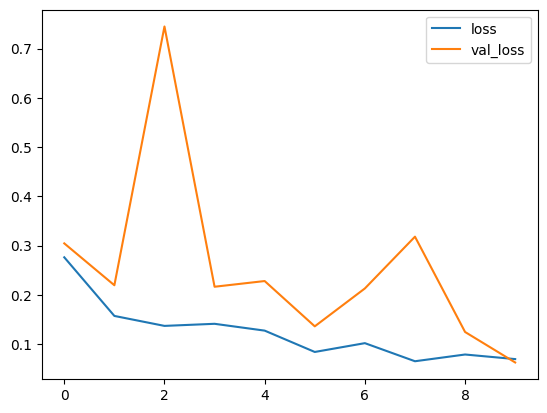

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration

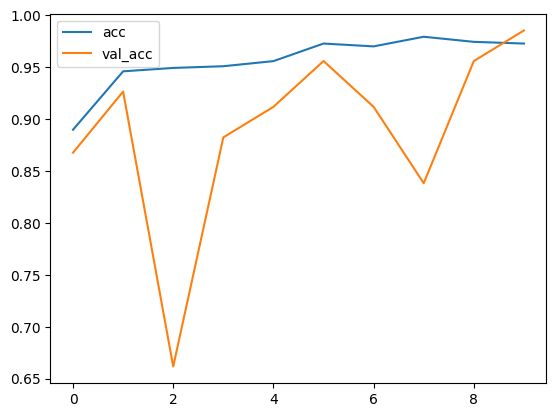

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 178ms/step
[[0.]]


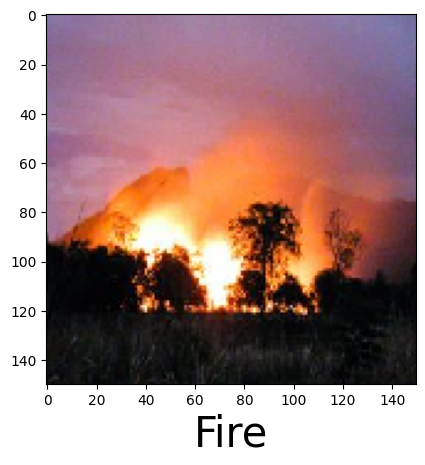

In [15]:
predictImage(r"C:\Users\surya\Downloads\AP-SM\Testing\fire\abc183.jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]


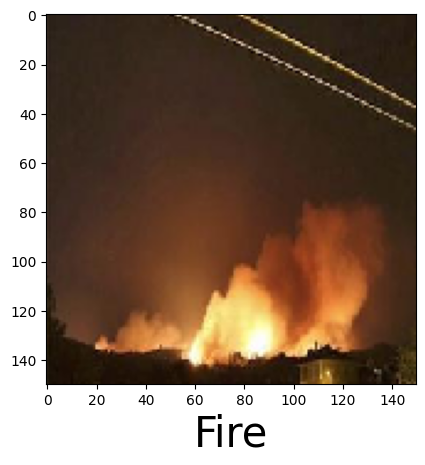

In [16]:
predictImage(r"C:\Users\surya\Downloads\AP-SM\Testing\fire\abc190.jpg")

1/1 [==============================] - 0s 24ms/step
[[1.]]


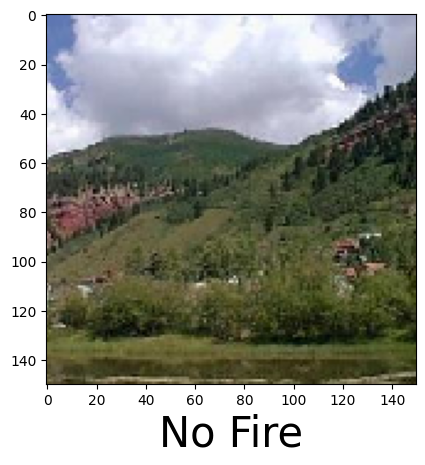

In [17]:
predictImage(r'C:\Users\surya\Downloads\AP-SM\Testing\nofire\abc346.jpg')

1/1 [==============================] - 0s 52ms/step
[[1.]]


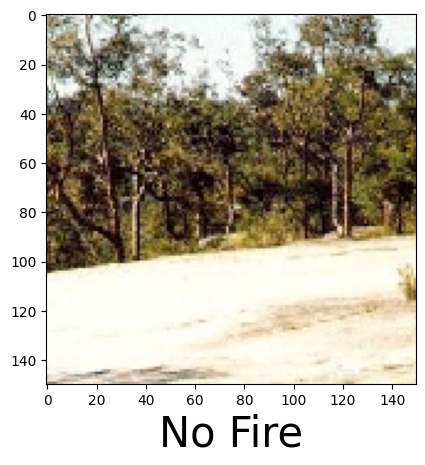

In [18]:
predictImage(r'C:\Users\surya\Downloads\AP-SM\Testing\nofire\abc361.jpg')

1/1 [==============================] - 0s 32ms/step
[[0.]]


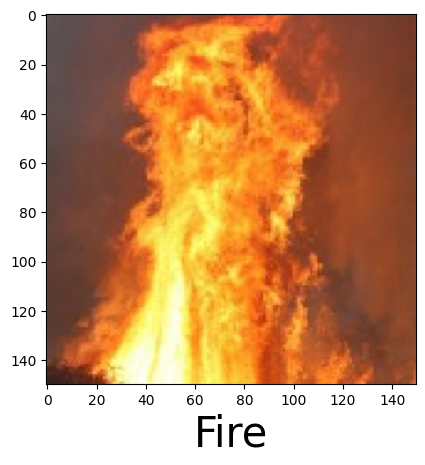

In [19]:
predictImage(r'C:\Users\surya\Downloads\AP-SM\Training and Validation\fire\abc011.jpg')

1/1 [==============================] - 0s 35ms/step
[[0.]]


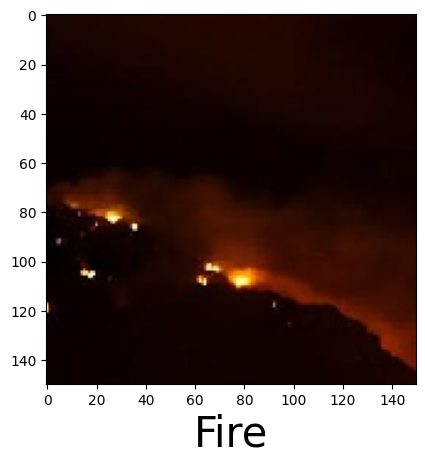

In [20]:
predictImage(r'C:\Users\surya\Downloads\AP-SM\Testing\fire\abc172.jpg')

1/1 [==============================] - 0s 56ms/step
[[1.]]


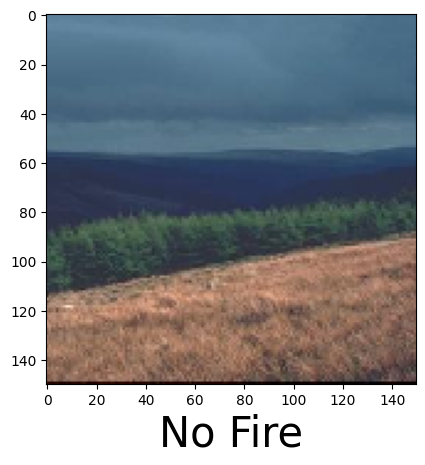

In [21]:
predictImage(r'C:\Users\surya\Downloads\AP-SM\Testing\nofire\abc341.jpg')



-----



# Final Thoughts



1.   Model is well performing in testing.
2.   The model can be improved further more as the graphs showing accuracy and loss are bit messy.
3.   Transfer Learning can be used to reduce the learning/training time significantly.







---

